# EDA(Exploratory Data Analysis) 탐색적 자료분석(데이터분석)
데이터 분석에 있어서 가장 초기 분석 단계이며 가장 중요한 단계이기도 하다.

데이터 수집 -> 데이터 전처리 -> 순수 데이터 -> EDA


{ EDA를 통해 알 수 있는 것 }

1) 데이터의 잠재적 문제 발견
2) 데이터의 다양한 패턴 발견
3) 자료수집을 위한 기반(추가자료가 필요한지)
4) 적절한 통계 분석 모델을 제시


{ EDA의 대상 }
- 일변량 : EDA를 통해 파악하려는 변수 1개 => 데이터를 설명하고 패턴을 찾는 것이 목적이다.
- 다변량 : EDA를 통해 파악하려는 변수 여러개 => 변수들간의 관게를 보는 것이 목적이다.

{ EDA의 목적 }
- 데이터 자료의 요약과 그래프 기법을 활용하여 자료의 구조 및 패턴을 파악
- 중앙값이 평균보다 중요하게 사용된다.(중앙값은 이상치에 영향을 적게 받기 때문에)
- 세심한 관찰, 실험&분석의 반복을 통해 패턴 발견

{ EDA의 종류 }
- 시각화 : 차트, 그림 등을 이용해서 데이터를 확인한다.
- 비시각화 : 그래픽 요소를 사용하지 않고, 수치 데이터(통계량)를 활용하여 데이터를 확인한다.

{ EDA의 순서 }
- 전체적인 데이터 분석 => 분석의 목적과 목적에 맞는 변수는 무엇인지, 데이터 검증(이상치, 오류, 결측치 등), 분포
- 데이터의 개별 속성값 관찰 => 개별 데이터가 전체적인 흐름과 특이사항 연관성, 시각화 & 비시각화를 통해 데이터 검증
- 속성 간의 관계 파악 => 개별 속성에서 찾아내지 못했던 조합, 패턴 발견(관계분석)

{ EDA의 분석 특징 }
- 저항성 : 데이터의 손상, 오류, 이상치 등에 적게 영향을 받아야 한다.
- 잔차해석 : 관찰 값들이 주 분포에서 얼마나 벗어나는지 분석해야 한다.
- 자료의 재표현 : 다른 방식(로그, 제곱, 역수)으로 데이터를 표현한다.
- 자료의 시각적 표현 : 데이터의 숨겨진 정보를 파악하기 위해 다양한 그래프를 이용한다.

# 통계분석
- 이상치 : 데이터에서 많이 벗어난 값

1) 표준편차 : 데이터의 분포가 정규분포를 이룰 때 표준편차 범위를 벗어나면 이상치로 간주한다.
2) IQR : 데이터의 분포가 정규분포를 이루지 않을 때, Q1 - 1.5*IQR, Q3 + 1.5*IQR 값을 벗어난 데이터를 이상치로 처리한다.

- 결측치 : 데이터에서 관측되어야 할 값을 얻지 못해 전처리가 필요한 데이터
  
1) 완전 무작위 결측(MCAR) : 결측치가 다른 변수들과 아무 상관관계가 없는 경우
2) 무작위 결측(MAR) : 특정 변수와 관련되어 누락됐지만, 변수들의 상관관계를 알 수 없는 경우
3) 비무작위 결측(NMAR) : 누락된 변수의 값이 누락된 이유와 관련이 있는 경우

- 결측치 처리

1) 완전제거법 : 하나의 변수라도 결측치가 발생하면 분석대상에서 제외시킨다.
2) 평균대체법 : 관측 데이터의 평균값으로 대체한다.
3) 연역적 대체법 : 같은 설문지 상, 비슷한 응답 패턴을 근거로 연역적으로 유추해서 결측값을 대체한다.
4) 일치대응 대체법 : 결측 정보를 다른 조사자료로 얻을 수 있는 경우
5) 핫덱대체법 : 다른 변수에서 동일한 특성을 갖는 응답 값을 근거로 랜덤으로 대체한다.
6) 회귀대체방법 : 회귀분석을 통해 추정치로 대체한다.
7) 다중대체법 : 결측치를 제외한 나머지 변수들로 여러 번 반복해서 해당 결측치를 예측한다.

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [124]:
# 공유자전거 데이터
df = pd.read_csv('nyc_citibike.csv')
df.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34


In [125]:
df.shape

(72035, 18)

In [126]:
df.describe()

,start_hour,end_hour,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,day_since_register
count,72035.000000,72035.000000,7.203500e+04,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000
mean,14.176775,14.372916,1.046751e+03,1535.681488,40.738587,-73.983531,1537.181287,40.738292,-73.983435,26139.737683,1977.994947,30.468522
std,4.809857,4.854897,8.139700e+03,1418.093403,0.029777,0.018456,1420.198780,0.029736,0.018639,5793.540983,11.868175,17.341855
min,0.000000,0.000000,6.100000e+01,72.000000,40.646538,-74.025353,72.000000,40.646538,-74.044247,14529.000000,1885.000000,1.000000
25%,10.000000,10.000000,3.980000e+02,382.000000,40.718939,-73.995481,382.000000,40.718939,-73.995299,20533.000000,1969.000000,15.000000
50%,15.000000,15.000000,6.810000e+02,504.000000,40.740343,-73.986580,503.000000,40.739974,-73.986580,27840.000000,1980.000000,30.000000
75%,18.000000,18.000000,1.201000e+03,3223.000000,40.758997,-73.973747,3224.000000,40.758924,-73.973747,30995.000000,1988.000000,46.000000
max,23.000000,23.000000,1.344462e+06,3680.000000,40.814394,-73.907744,3680.000000,40.814394,-73.907744,33671.000000,2002.000000,60.000000


In [127]:
df.isnull().sum()

start_date                 0
end_date                   0
start_hour                 0
end_hour                   0
trip_duration              0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
usertype                   0
birth_year                 0
gender                     0
day_since_register         0
dtype: int64

In [128]:
df.isnull().sum().to_frame('null count')

,null count
start_date,0
end_date,0
start_hour,0
end_hour,0
trip_duration,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0


In [129]:
pd.DataFrame(data=df.isnull().sum()/len(df), columns=['null ration'])

,null ration
start_date,0.0
end_date,0.0
start_hour,0.0
end_hour,0.0
trip_duration,0.0
start_station_id,0.0
start_station_name,0.0
start_station_latitude,0.0
start_station_longitude,0.0
end_station_id,0.0


In [130]:
df.dtypes

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72035 entries, 0 to 72034
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start_date               72035 non-null  object 
 1   end_date                 72035 non-null  object 
 2   start_hour               72035 non-null  int64  
 3   end_hour                 72035 non-null  int64  
 4   trip_duration            72035 non-null  int64  
 5   start_station_id         72035 non-null  int64  
 6   start_station_name       72035 non-null  object 
 7   start_station_latitude   72035 non-null  float64
 8   start_station_longitude  72035 non-null  float64
 9   end_station_id           72035 non-null  int64  
 10  end_station_name         72035 non-null  object 
 11  end_station_latitude     72035 non-null  float64
 12  end_station_longitude    72035 non-null  float64
 13  bike_id                  72035 non-null  int64  
 14  usertype              

In [132]:
# 시각화에서 중요한 범주형, 연속형 데이터를 구분
# 범주형 변수 : 빈도(frequency) 확인 가능
# 연속형 변수 : 평균, 표준편차, 분산 등의 수학적 계산 가능

# string형으로 바꾸기
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)

In [133]:
df.dtypes

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

- 주행시간(start_date, end_date, start_hour, end_hour, trip_duration)
  
- 주행위치(start_station_id, start_station_name, start_station_latitude, start... , end_station_longitude)
  
- 바이크 종류(bike_id)

- 유저정보(usertype, birth_year, gender, day_since_register)

// 변수에 대해 알고싶은 정보를 생각해내야 한다.

* 단변량 분석
    - 예시1) 평균 trip_duration 얼마일까?
    - 예시2) 가장 대여건수가 많은 시간은 언제일까?
    - 예시3) 유저들의 성별 분포는 어떨까?

- 다변량 가설
    - 예시1) 신규 가입자들이 한 번 탈 때, 더 짧게 쓰지 않을까?
    - 예시2) start_hour가 새벽 시간이면 trip_duration이 짧지 않을까?
    - 예시3) gender에 따라 trip_duration이 다르지 않을까?

In [134]:
# trip_duration의 분포를 우선적으로 파악해보자.
df['trip_duration'].describe()

count    7.203500e+04
mean     1.046751e+03
std      8.139700e+03
min      6.100000e+01
25%      3.980000e+02
50%      6.810000e+02
75%      1.201000e+03
max      1.344462e+06
Name: trip_duration, dtype: float64

In [135]:
df['trip_duration_min'] = df['trip_duration']/60
df['trip_duration_min'].describe()

count    72035.000000
mean        17.445851
std        135.661662
min          1.016667
25%          6.633333
50%         11.350000
75%         20.016667
max      22407.700000
Name: trip_duration_min, dtype: float64

=> 가장 적게 빌린 시간 1분, 평균적으로 17분이며, 최댓값은 22407분인 것을 보아 이상치가 속해있을 것임을 예측할 수 있다.

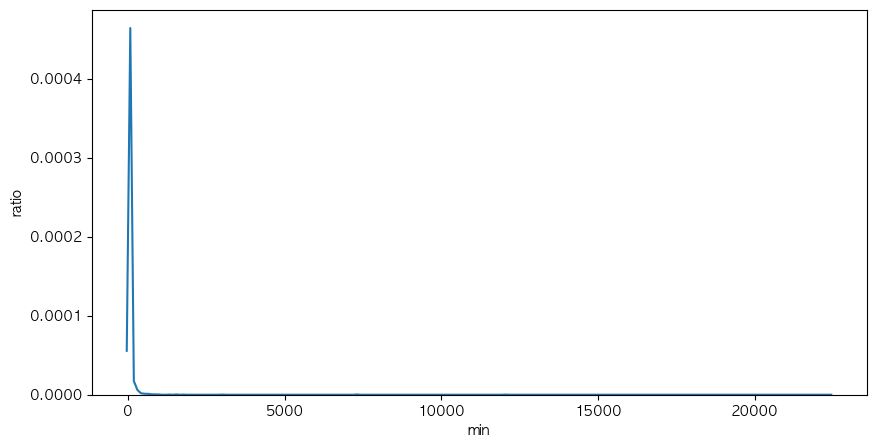

In [136]:
plt.figure(figsize=(10, 5))

kde = sns.kdeplot(df['trip_duration_min'])
kde.set_xlabel('min')
kde.set_ylabel('ratio')

plt.show()

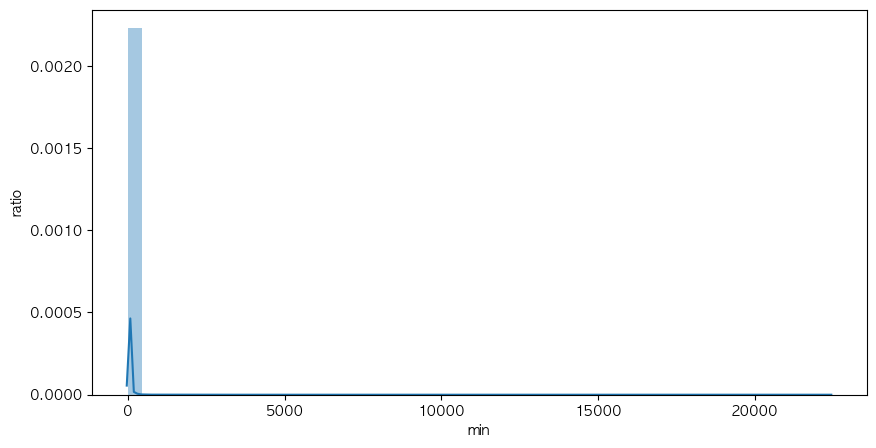

In [137]:
plt.figure(figsize=(10, 5))
dist=sns.distplot(df['trip_duration_min'])
dist.set_xlabel('min')
dist.set_ylabel('ratio')
plt.show()

- 분포를 보고 판단할 3가지
    - 정규분포를 따르고 있는가?
    - 정규 분포와 비슷한 형태를 띄는가?
    - 눈에 띄는 치우침(skewness) 정도나 얼마나 뾰족(kurtosis)한가?

In [138]:
print('Skwness: %f'%df['trip_duration_min'].skew()) # 왜도
# 왜도 : 0에 가까울 수록 분포가 좌우 대칭이다.
# 음수 왜도 : 왼쪽으로 치우친 분포
# 양수 왜도 : 오른쪽으로 치우친 분포
# 116 : 오른쪽으로 굉장히 치우친 분포다. 데이터가 낮은 값에 몰려있고, 높은 값들이 따로 존재한다.

print('Kurtosis: %f'%df['trip_duration_min'].kurt()) # 첨도
# 첨도 : 분포의 꼬리 부분이 얼마나 두꺼운지 나타낸다. 값이 3에 가까울 수록 정규분포를 따른다.
# 3보다 작은 첨도 : 평평한 분포
# 3보다 큰 첨도 : 뾰족한 분포
# 15913 : 분포의 꼬리가 굉장히 두껍다. 극단값이 많이 존재함을 알 수 있다.

Skwness: 116.002624
Kurtosis: 15913.196644


In [139]:
# 이상치 제거
    # y값에 굉장히 큰 값이 존재하여 해당 이상치를 제거하여 EDA를 진행하겠다.

# y값 기준 최상위 1%의 값을 제거하고 진행하겠다.
cut_point = df['trip_duration_min'].quantile(0.99) # 상위 0.1%의 값을 cut_point에 지정
df_cut = df[df['trip_duration_min'] < cut_point]

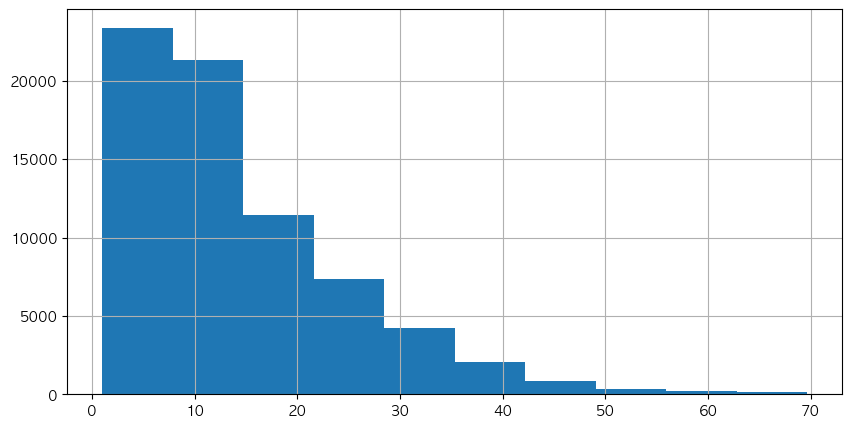

In [140]:
plt.figure(figsize=(10, 5))
df_cut['trip_duration_min'].hist()
plt.show()

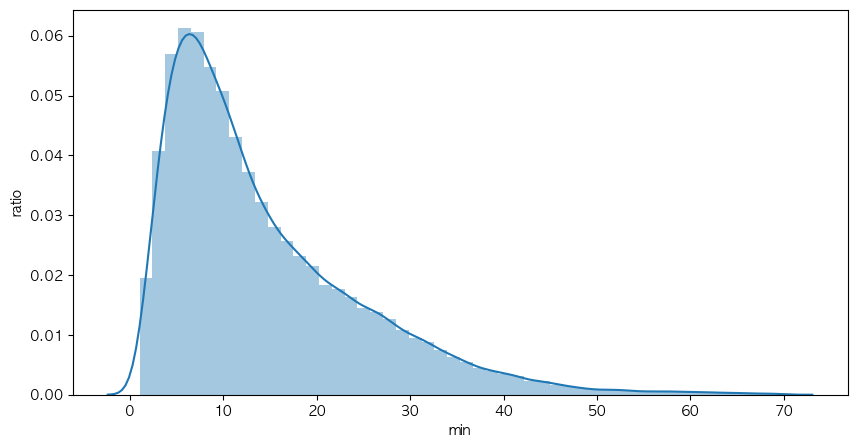

In [141]:
plt.figure(figsize=(10, 5))
dist = sns.distplot(df_cut['trip_duration_min'])
dist.set_xlabel('min')
dist.set_ylabel('ratio')
plt.show()

In [142]:
print('Skewness: %f'%df_cut['trip_duration_min'].skew())
print('Kurtosis: %f'%df_cut['trip_duration_min'].kurt())

Skewness: 1.418011
Kurtosis: 2.307984


In [143]:
# 범주형 데이터의 빈도
df_cut['start_hour'].value_counts()

start_hour
18    8171
17    7954
8     6640
19    5576
16    4687
9     4265
7     3971
20    3624
15    3544
14    3398
13    3210
12    3109
11    2763
10    2640
21    2374
6     1855
22    1574
23     918
5      476
0      235
1      110
2       77
4       77
3       66
Name: count, dtype: int64

In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rc
import numpy as np
import seaborn as sns

rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)
plt.rcParams['figure.figsize'] = (12, 8)

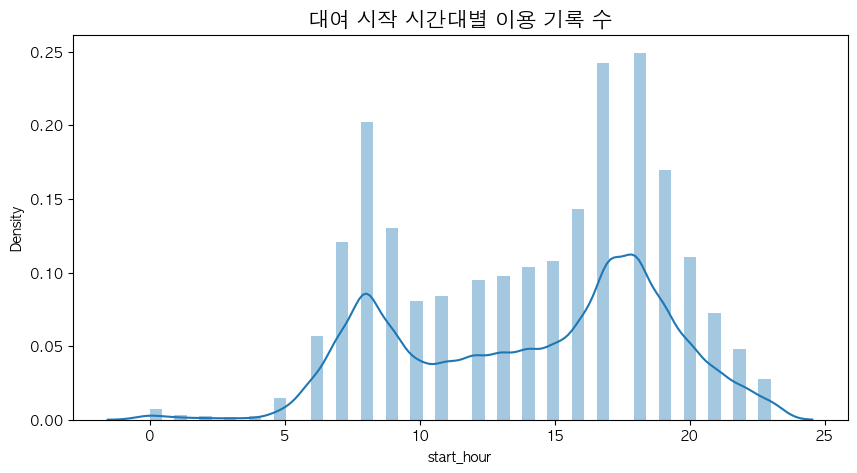

In [145]:
# 대여 시작 시간대별 이용 기록 수
plt.figure(figsize=(10, 5))
dist = sns.distplot(df_cut['start_hour'])
plt.title('대여 시작 시간대별 이용 기록 수', size=15)
plt.show()

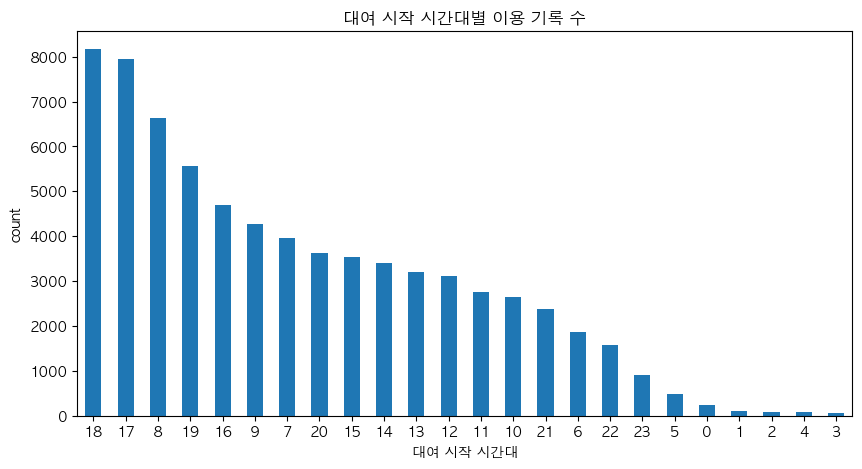

In [146]:
# 위 문제 강사님 코드
plt.figure(figsize=(10, 5))
df_cut['start_hour'].value_counts().plot(kind='bar')
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.title('대여 시작 시간대별 이용 기록 수')
plt.show()

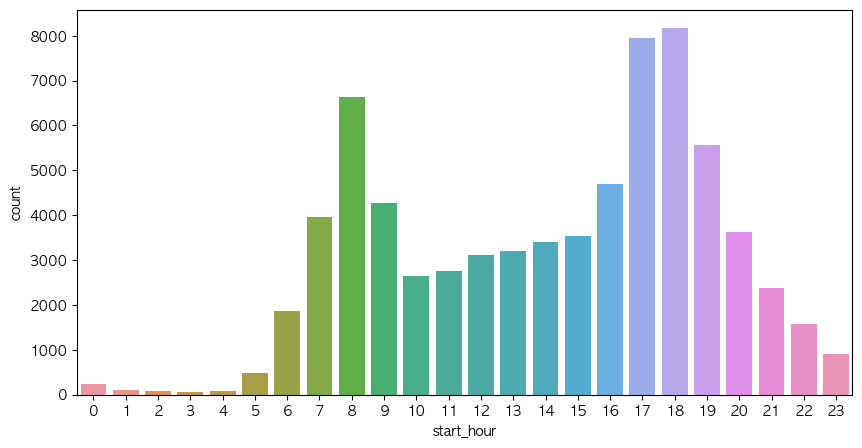

In [147]:
plt.figure(figsize=(10, 5))

vc = df_cut['start_hour'].value_counts()
sns.barplot(x=vc.index, y=vc)
plt.show()

In [148]:
# 0~23 출력, 빈도가 낮은 것 출력

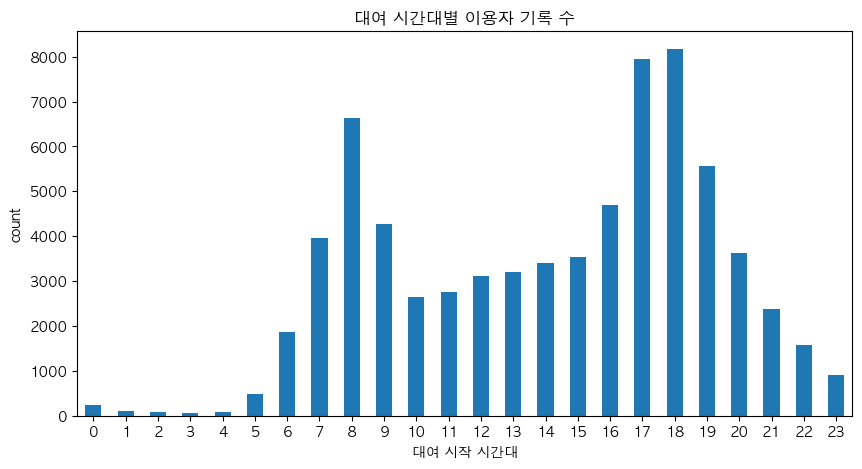

In [149]:
# 시간순에 따라 정렬(0시 - 23시)
plt.figure(figsize=(10, 5))
df_cut['start_hour'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.title('대여 시간대별 이용자 기록 수')
plt.show()

In [150]:
df_cut['start_hour'].value_counts(ascending=True)
# ascending = True : 오름차순, ascending = False : 내림차순

start_hour
3       66
4       77
2       77
1      110
0      235
5      476
23     918
22    1574
6     1855
21    2374
10    2640
11    2763
12    3109
13    3210
14    3398
15    3544
20    3624
7     3971
9     4265
16    4687
19    5576
8     6640
17    7954
18    8171
Name: count, dtype: int64

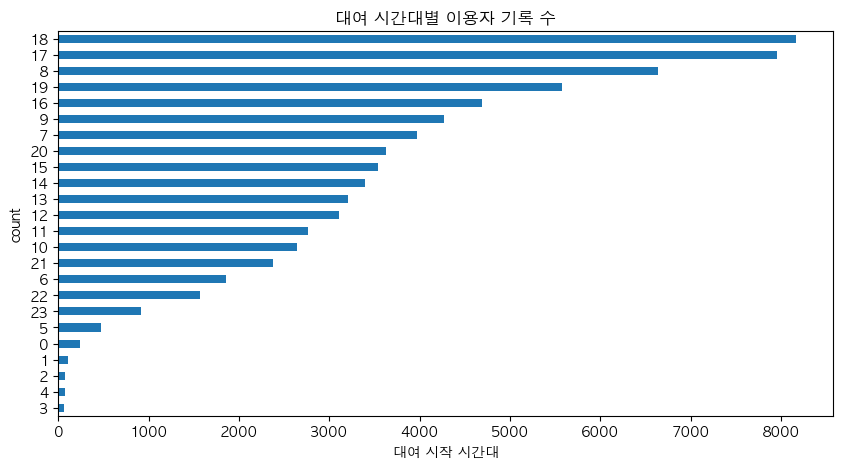

In [151]:
plt.figure(figsize=(10, 5))
df_cut['start_hour'].value_counts(ascending=True).plot(kind='barh')
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.title('대여 시간대별 이용자 기록 수')
plt.show()

- 주로 출/퇴근 시간에 사용자가 많은 것으로 보이며, 이동이 적은 새벽 시간대에는 이용자가 급격하게 적어지는 것을 확인할 수 있다.

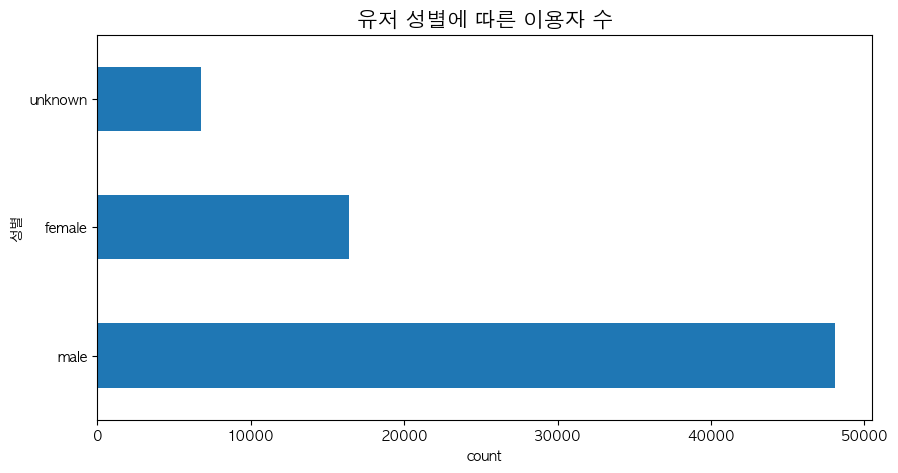

In [152]:
# 성별에 따른 이용자 수(gender)
plt.figure(figsize=(10, 5))
df_cut['gender'].value_counts().plot(kind='barh')

plt.xlabel('count')
plt.ylabel('성별')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('유저 성별에 따른 이용자 수', size=15)
plt.show()

- 남성 유저가 여성 유저보다 3배정도 많다.

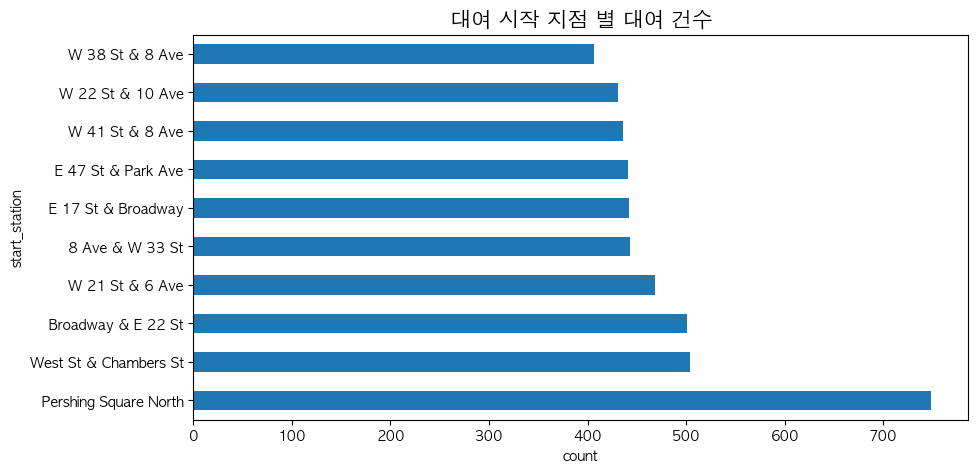

In [153]:
# 시작 지점별 빈도
plt.figure(figsize=(10, 5))
df_cut['start_station_name'].value_counts().nlargest(10).plot(kind='barh')
# nlargest(10) : 상위 10개 출력

plt.xlabel('count')
plt.ylabel('start_station')
plt.xticks(rotation=0)
plt.title('대여 시작 지점 별 대여 건수', size=15)
plt.show()

# 이진 변수 분석
- 그동안은 변수 하나만 가지고 분석을 진행했다면, 이제는 두 개의 변수를 사용하고자 한다.

1) 연속형 & 연속형 : Scatter plot -> Correlation(산점도 그래프)(상관관계가 존재하는가)
2) 범주형 & 범주형 : 누적 막대 그래프 -> 카이제곱 분석(두 변수가 독립적인지)
3) 범주형 & 연속형 : 누적 막대 그래프, 범주별 Histogram -> 범주 2개
   
                 : T-test, Z-test -> 범주 3개 이상
                 : ANOVA(분산분석)

<Figure size 1000x500 with 0 Axes>

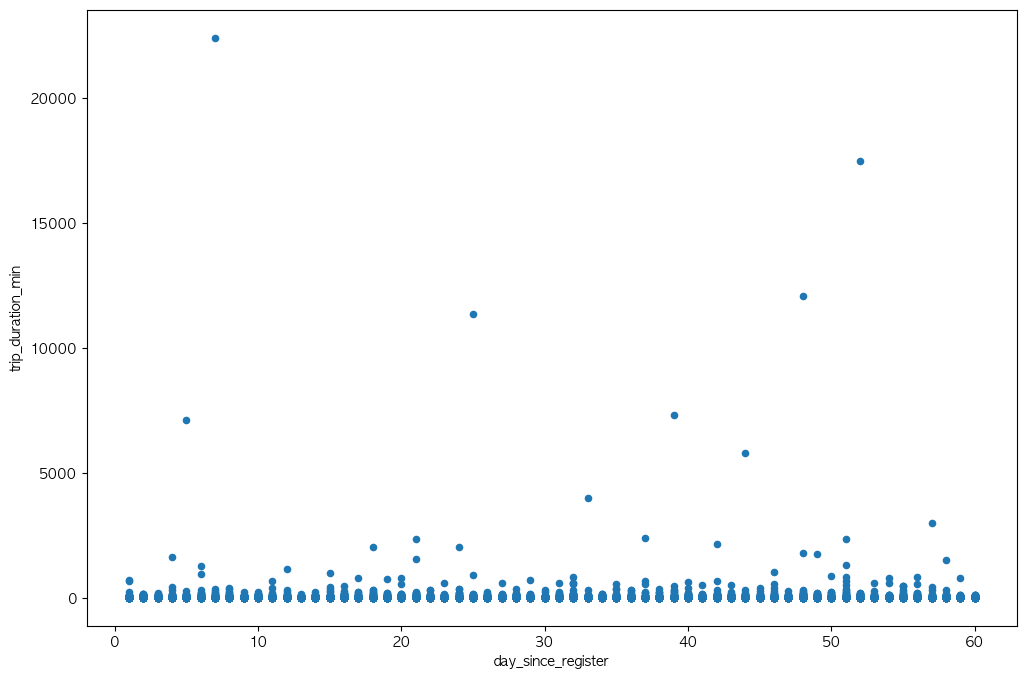

In [154]:
# 연속형 & 연속형 : 신규 가입자일수록 주행 시간이 더 짧지 않을까?
plt.figure(figsize=(10, 5))
df.plot.scatter(x='day_since_register', y='trip_duration_min')
plt.show()

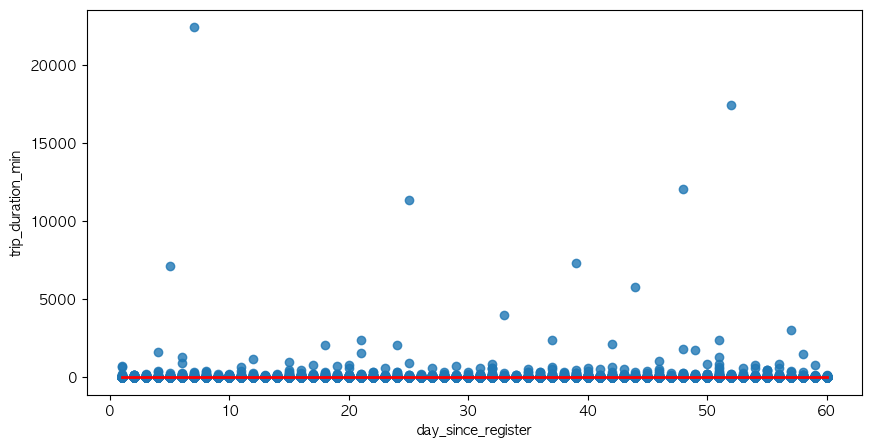

In [155]:
plt.figure(figsize=(10, 5))
reg = sns.regplot(x=df['day_since_register'], y=df['trip_duration_min'], line_kws={'color':'red', 'lw':2})
plt.show()

- 신규 가입자일 수록 주행 시간이 더 짧을 것이라고 예측하였지만, 가설과는 반대로 의미있는 결과가 나오지 않는 것을 살펴볼 수 있었다.
- 따라서 신규 가입자와 주행 시간은 상관관계가 크지 않다.(없다.)

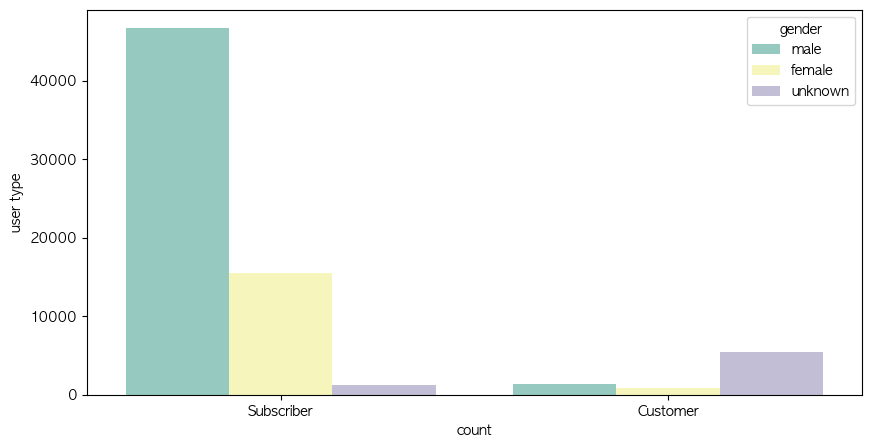

In [156]:
# 범주형 & 범주형 : 범주형 데이터 user_type과 다른 범주형 데이터 간의 관계
plt.figure(figsize=(10, 5))
cnt = sns.countplot(x='usertype', hue='gender', data=df_cut, palette='Set3')
# hue : usertype에 대해 gender에 따라 다른 색상의 막대를 그리게 된다.
cnt.set_xlabel('count')
cnt.set_ylabel('user type')
plt.show()

In [157]:
top_list = df_cut['start_station_name'].value_counts().nlargest(10).index
# df_cut['start_station_name'].isin(top_list)
df_top = df_cut[df_cut['start_station_name'].isin(top_list)]
df_top.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register,trip_duration_min
6,2018-05-01,2018-05-01,3,4,2102,490,8 Ave & W 33 St,40.751551,-73.993934,387,Centre St & Chambers St,40.712733,-74.004607,33314,Customer,1970,male,41,35.033333
33,2018-05-01,2018-05-01,1,2,1856,523,W 38 St & 8 Ave,40.754666,-73.991382,499,Broadway & W 60 St,40.769155,-73.981918,17240,Customer,1983,male,30,30.933333
50,2018-05-01,2018-05-01,4,4,642,519,Pershing Square North,40.751873,-73.977706,3142,1 Ave & E 62 St,40.761227,-73.960940,32414,Subscriber,1989,male,24,10.700000
103,2018-05-01,2018-05-01,2,2,845,519,Pershing Square North,40.751873,-73.977706,504,1 Ave & E 16 St,40.732219,-73.981656,25781,Subscriber,1992,male,11,14.083333
114,2018-05-01,2018-05-01,3,3,327,477,W 41 St & 8 Ave,40.756405,-73.990026,508,W 46 St & 11 Ave,40.763414,-73.996674,15064,Subscriber,1980,male,20,5.450000


In [158]:
df_cut['start_station_name'].value_counts().nlargest(10)

start_station_name
Pershing Square North    749
West St & Chambers St    504
Broadway & E 22 St       501
W 21 St & 6 Ave          468
8 Ave & W 33 St          443
E 17 St & Broadway       442
E 47 St & Park Ave       441
W 41 St & 8 Ave          436
W 22 St & 10 Ave         431
W 38 St & 8 Ave          407
Name: count, dtype: int64

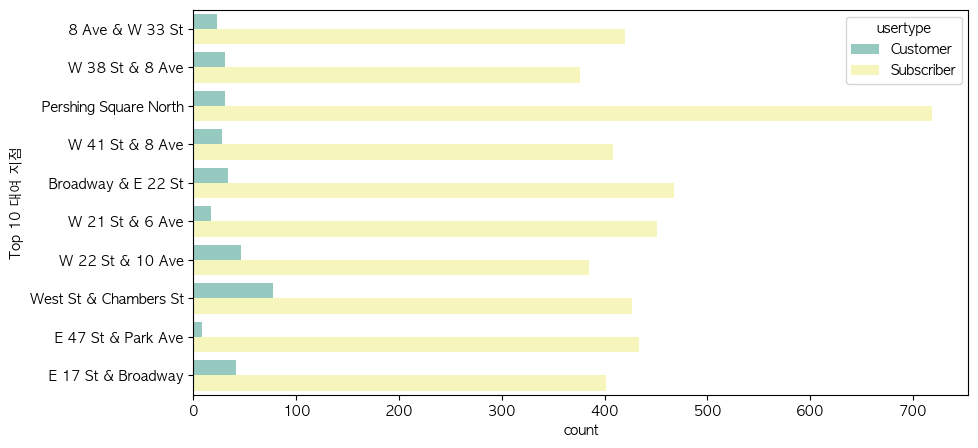

In [159]:
# 상위 시작지점 10개와 유저타임, 수평 누적막대 그래프
plt.figure(figsize=(10, 5))
cnt = sns.countplot(y='start_station_name', hue='usertype', palette='Set3',
                    data=df_top)
# start_station_name을 뽑아서 그냥 넣어주면 오류가 발생한다.
# 따라서 해당 부분으로 이루어진, 열이 추가된 새로운 df를 선언해주는 과정이 필요하다.
cnt.set_xlabel('count')
cnt.set_ylabel('Top 10 대여 지점')
plt.show()

- 사용자는 직장인 비율이 높을 것으로 예상하였다.
- 구독자가 가장 많은 'Pershing Square North' 지역엔 회사가 많이 몰려있을 것이다.
- 'Customer' 사용자가 많은 'West ST & Chambers ST'는 관광지일 가능성이 높다.

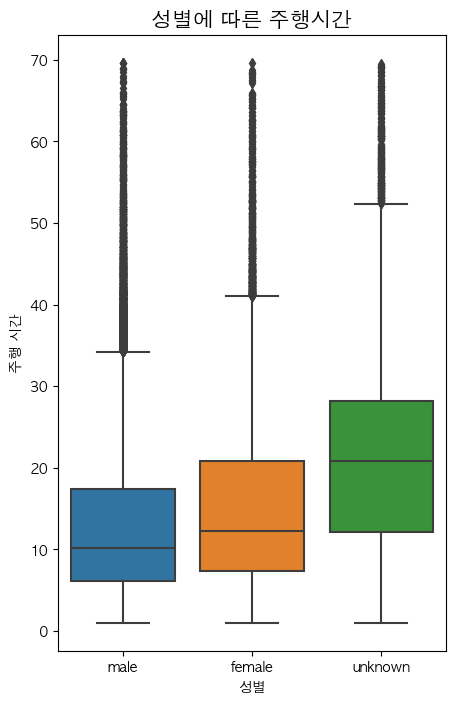

In [160]:
# 범주형 & 연속형
# 성별과 주행시간(boxplot)
plt.figure(figsize=(5, 8))
box = sns.boxplot(x='gender', y='trip_duration_min', data=df_cut)
box.set_xlabel('성별')
box.set_ylabel('주행 시간')
plt.title('성별에 따른 주행시간', size=15)
plt.show()

- 유저수 기준으론 남성이 더욱 많았지만, 이용시간은 여성유저가 더 높은 것을 알 수 있다.
- unknown : unkown 중엔 Customer이 더 많았다, 이는 관광을 온 고객이 사용했을 경우가 높음을 의미한다. 따라서 usertime이랑 trip_duration_min과 연관성이 높을 가능성이 크다.

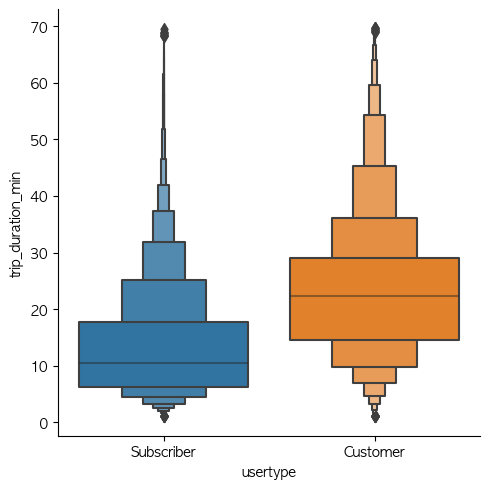

In [161]:
sns.catplot(x='usertype', y='trip_duration_min', kind='boxen', data=df_cut)
plt.show()

- 본 결과를 통해 위 가정이 사실임을 알아볼 수 있다.
  

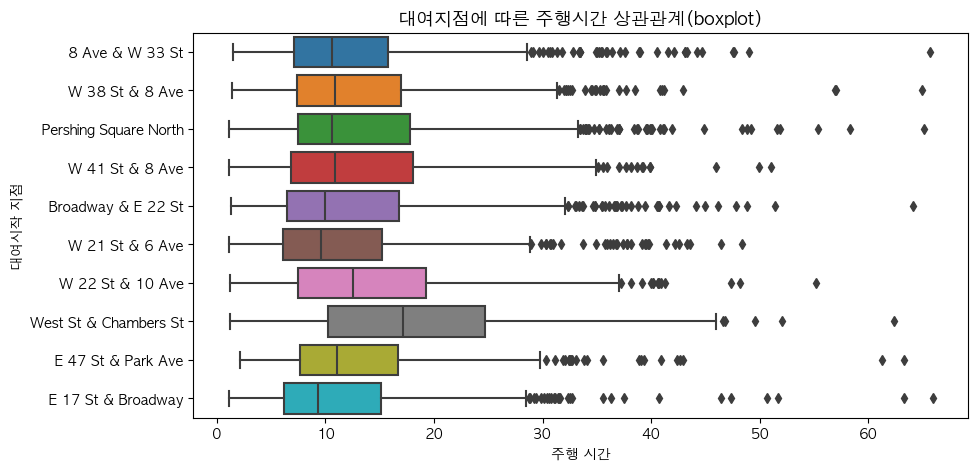

In [162]:
# 주행시간과 대여지점 관계를 추출(가로 boxplot)
plt.figure(figsize=(10, 5))
box = sns.boxplot(y='start_station_name', x='trip_duration_min', data=df_top)
box.set_xlabel('주행 시간')
box.set_ylabel('대여시작 지점')
plt.title('대여지점에 따른 주행시간 상관관계(boxplot)', size=13)
plt.show()

- West ST & Chamber St에서 주행시간이 가장 높은 것을 알 수 있다. 이는 이전 그래프에서 회사가 많이 몰려있는 곳임을 예측하였다.(본 지점은 가장 신경써서 분석해 볼 가치가 있다.)
- 주행시간이 가장 높은 장소에 유지, 보수 및 공급을 늘릴 필요가 있다.
- West ST & Chamber St의 평균 사용시간, 박스플롯의 길이, 이전에 확인했던 이용자 수까지 고려했을 때, 해당 지역에서 수입을 늘리기 위해선 자전거 수를 늘리거나, 해당 지역의 자전거 수리보수 인원을 늘린다.(오프라인 마케팅 집중)

<Figure size 1000x1000 with 0 Axes>

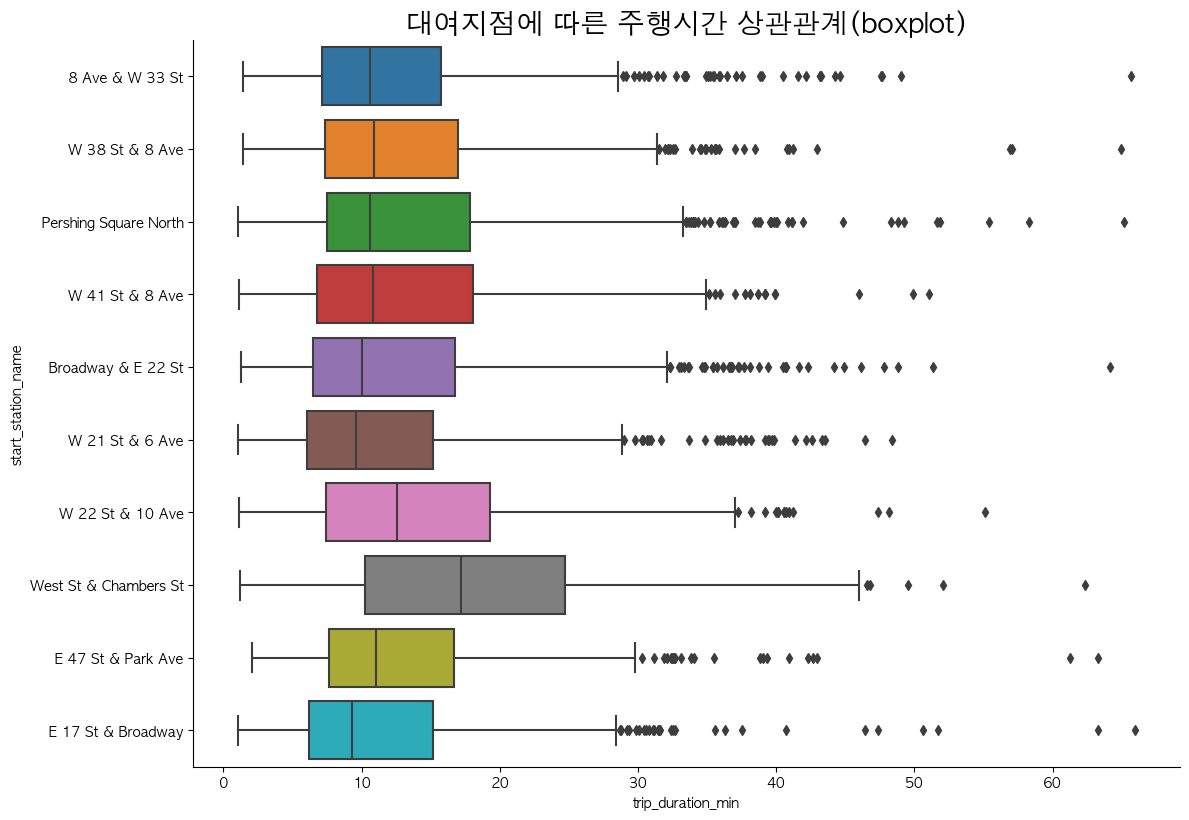

In [163]:
plt.figure(figsize=(10, 10))
sns.catplot(y='start_station_name', x='trip_duration_min', kind='box', data=df_top, height=8, aspect=1.5)
box.set_xlabel('주행 시간')
box.set_ylabel('대여시작 지점')
plt.title('대여지점에 따른 주행시간 상관관계(boxplot)', size=20)
plt.show()

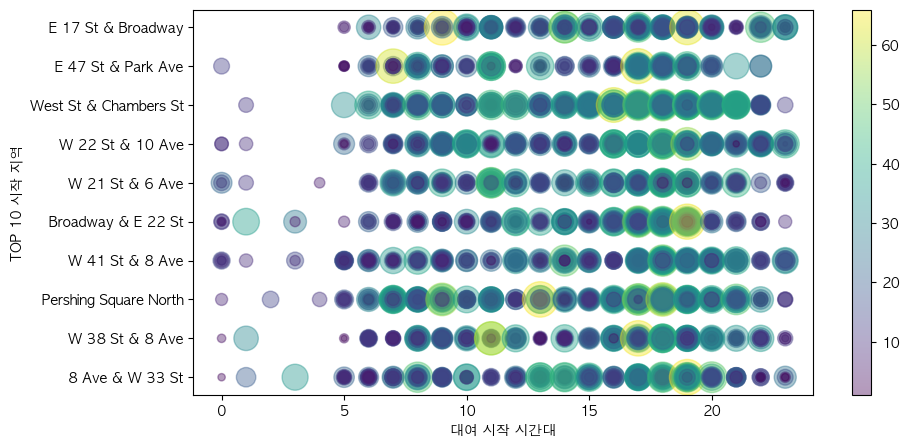

In [166]:
# 3개 이상의 변수
# Scatter plot : x, y, 크기, 색상
# TOP 10 지역, 대여 시작 시간, 대여 기간
plt.figure(figsize=(10, 5))
plt.scatter(df_top['start_hour'], # x축(시작 시간)
            df_top['start_station_name'], # y축(TOP 10 지역)
            c=df_top['trip_duration_min'], # 색상 대여 시간
            s=df_top['trip_duration_min']*10, # 사이즈 대여 시간
            alpha=0.4,
            cmap='viridis')

plt.colorbar()
plt.xlabel('대여 시작 시간대')
plt.ylabel('TOP 10 시작 지역')

plt.show()

- 특정 지역의 출/퇴근 시간 예측이 가능하다.
- 지역에 따른 회사 밀집도 또한 예측이 가능하다.
- 출/퇴근 시간에 이용자 수가 몰려있는 것을 확인할 수 있다.
- 관광지로 예측한 부분은 대여 시간이 고르게 분포하고 있는 모습을 살펴볼 수 있다.
- 특정 지역 새벽 시간에도 약간의 수요가 있다.

In [171]:
# 3개의 변수, 히트맵
# Scatter plot : x, y, 크기, 색상
# TOP 10 지역, 대여 시작 시간, bike id
base = df_top.groupby(['start_station_name', 'start_hour'])['bike_id'].count().unstack()
base

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start_station_name,,,,,,,,,,,,,,,,,,,,,
8 Ave & W 33 St,1.0,1.0,NaN,1.0,NaN,12.0,23.0,21.0,45.0,34.0,...,9.0,19.0,23.0,53.0,53.0,48.0,17.0,21.0,15.0,5.0
Broadway & E 22 St,5.0,1.0,NaN,2.0,NaN,1.0,5.0,9.0,32.0,16.0,...,26.0,20.0,30.0,74.0,133.0,67.0,15.0,8.0,6.0,1.0
E 17 St & Broadway,NaN,NaN,NaN,NaN,NaN,2.0,7.0,11.0,17.0,26.0,...,30.0,21.0,36.0,56.0,54.0,41.0,28.0,7.0,16.0,9.0
E 47 St & Park Ave,1.0,NaN,NaN,NaN,NaN,5.0,11.0,36.0,34.0,14.0,...,6.0,12.0,34.0,116.0,97.0,30.0,8.0,1.0,2.0,NaN
Pershing Square North,1.0,NaN,1.0,NaN,1.0,6.0,9.0,57.0,99.0,72.0,...,17.0,27.0,39.0,100.0,128.0,62.0,20.0,18.0,9.0,3.0
W 21 St & 6 Ave,3.0,1.0,NaN,NaN,1.0,NaN,9.0,22.0,30.0,29.0,...,17.0,23.0,30.0,46.0,71.0,34.0,20.0,22.0,2.0,8.0
W 22 St & 10 Ave,2.0,1.0,NaN,NaN,NaN,4.0,3.0,20.0,35.0,32.0,...,19.0,13.0,34.0,30.0,65.0,28.0,29.0,23.0,26.0,8.0
W 38 St & 8 Ave,1.0,1.0,NaN,NaN,NaN,2.0,20.0,8.0,37.0,42.0,...,18.0,17.0,17.0,53.0,61.0,43.0,11.0,10.0,9.0,4.0
W 41 St & 8 Ave,5.0,1.0,NaN,2.0,NaN,38.0,29.0,10.0,21.0,31.0,...,16.0,14.0,11.0,51.0,76.0,42.0,25.0,16.0,7.0,7.0


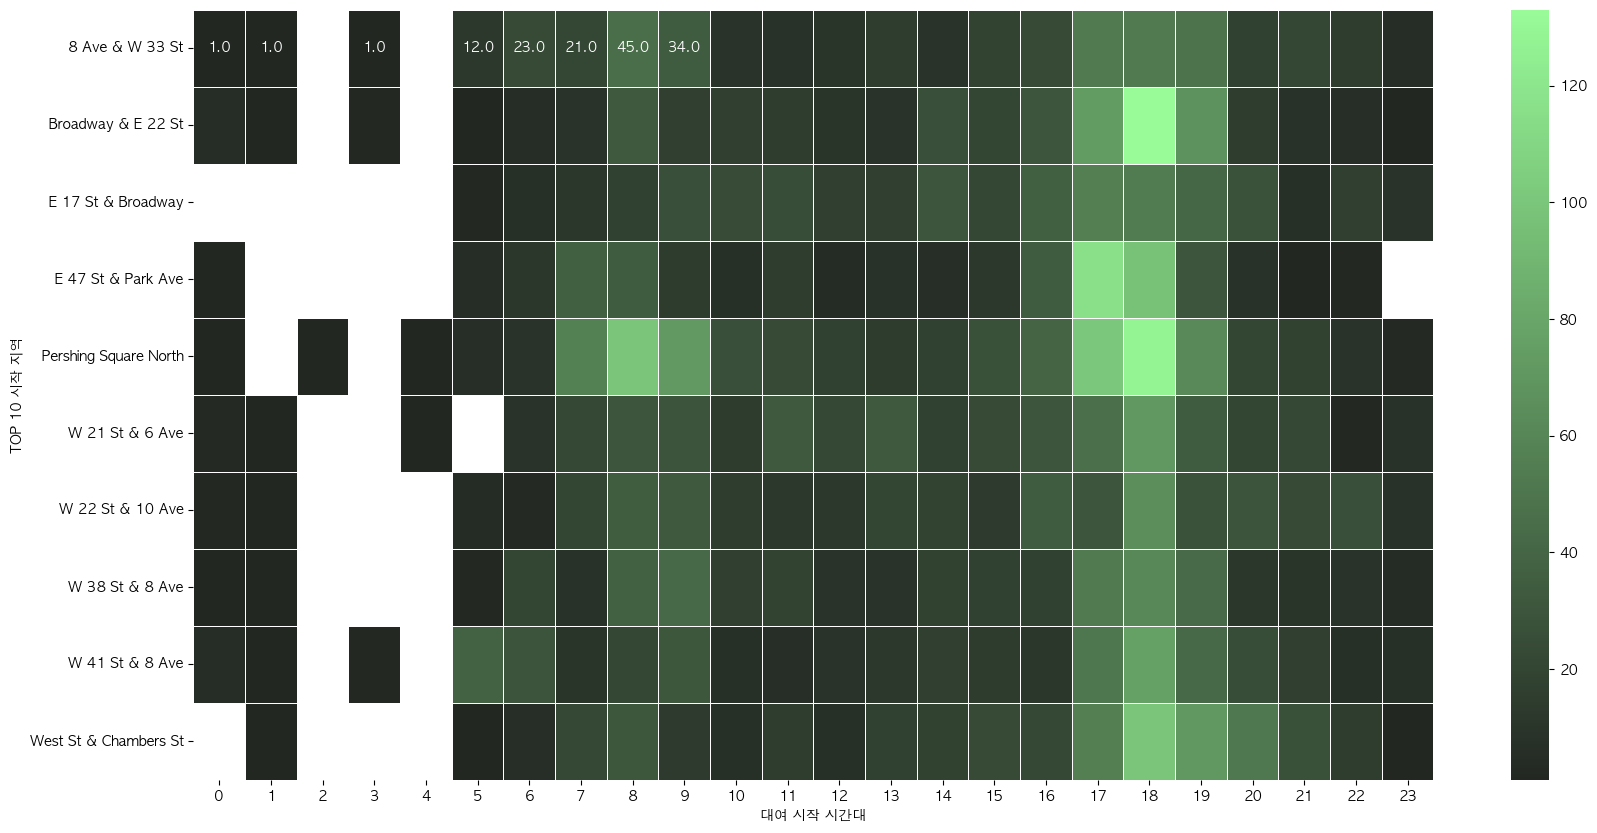

In [177]:
fig, ax = plt.subplots(figsize=(20, 10))
pal = sns.dark_palette("palegreen", as_cmap=True)  
# as_cmap : 해당 팔레트를 cmap으로 변경할 것인지 물어보는 키워드
# = 연속적인 컬러?로 변경할 것인지.
sns.heatmap(base, 
            annot=True, # 숫자 표기
            ax = ax, # 축을 동일시(특정 축을 기준으로 히트맵을 작성하겠다.)
            linewidths=.5, # 히드맵 사이 거리
            fmt='.1f', # 소수점 지정
            cmap=pal) 

plt.xlabel('대여 시작 시간대')
plt.ylabel('TOP 10 시작 지역')
plt.show()

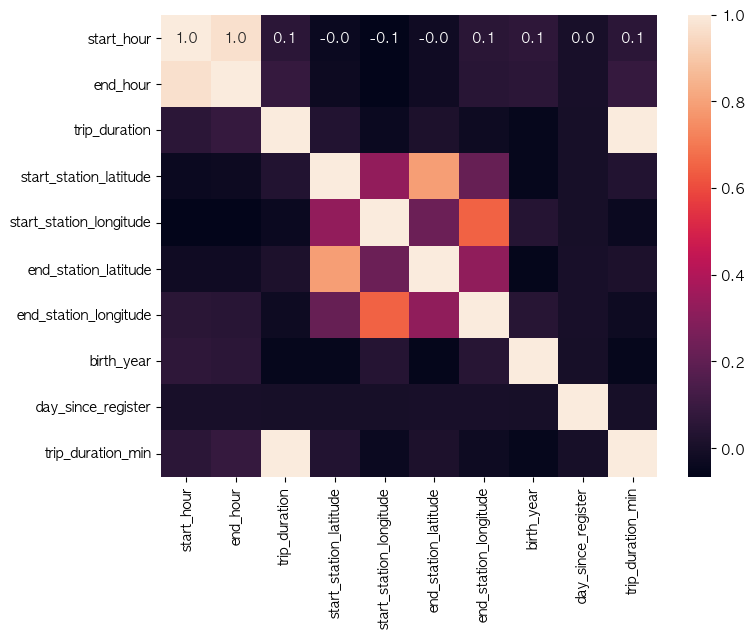

In [187]:
def draw_corrmat(df):
    y_corr = df.corr()
    f, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(y_corr, annot=True, fmt='.1f')
    
df_cut = df_cut.select_dtypes(include=[np.number]) # 숫자 데이터에 대한 히트맵
draw_corrmat(df_cut)

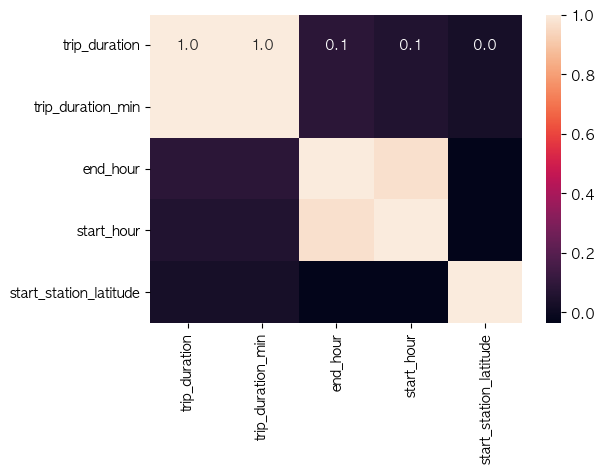

In [195]:
# 특정 데이터와 상관관계가 강한 데이터 몇 개만 추출
def draw_corrmat_top(df, y, k):
    y_corr = df.corr()
    y_cols = y_corr.nlargest(k, y)[y].index
    cm = np.corrcoef(df[y_cols].values.T) # 상관 행렬
    f, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='.1f', xticklabels=y_cols.values, yticklabels=y_cols.values)
    plt.show()

draw_corrmat_top(df_cut, 'trip_duration_min', 5)

1) 가정1. 나이대가 높아질 수록 사용률이 떨어질 것이다.
2) 가정2. 나이대가 높아질 수록 사용시간 또한 적어질 것이다.
3) 가정3. 

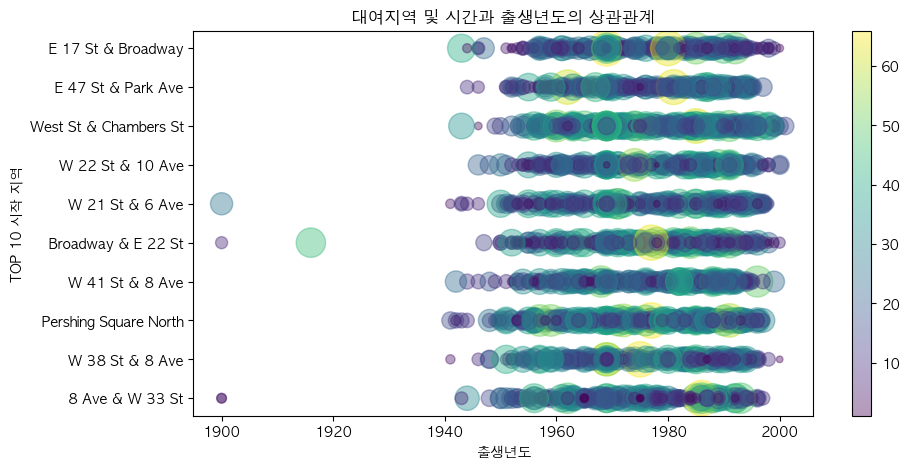

In [212]:
plt.figure(figsize=(10, 5))
plt.scatter(df_top['birth_year'],
            df_top['start_station_name'], 
            c=df_top['trip_duration_min'], 
            s=df_top['trip_duration_min']*10, 
            alpha=0.4,
            cmap='viridis')

plt.colorbar()
plt.xlabel('출생년도')
plt.ylabel('TOP 10 시작 지역')
plt.title('대여지역 및 시간과 출생년도의 상관관계')

plt.show()

- 본 결과를 통해 1940년대생부터 2000년대생의 대여율이 높은 것을 확인할 수 있으며, 나이가 적을 수록 자전거 대여율이 높은 것을 확인할 수 있다.
- 특히 1960년대에서 1980년대생들의 대여율이 높았고, 1980년대생들의 대여 시간이 평균적으로 가장 높았음을 확인할 수 있었다.
- 특이점은 나이대에 따른 사용시간 변화가 거의 없다는 것이다.
- 추가로 'Broadway & E 22St' 지역에선 예외적인 모습이 발견되었는데, 1900년에서 1920년대생의 대여 건수가 발견되었다는 것이다.

  -> 세 번째 주장을 증명하고자, 출생년도와 사용시간을 비교하는 그래프를 출력하고자 한다.

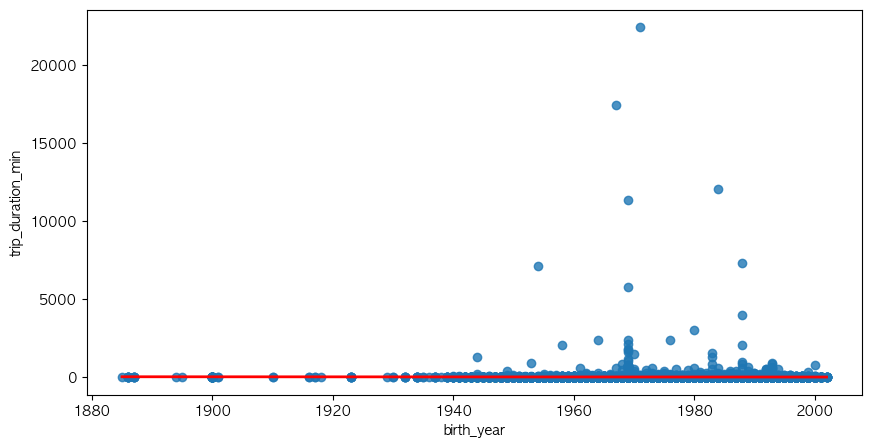

In [213]:
plt.figure(figsize=(10, 5))
reg = sns.regplot(x=df['birth_year'], y=df['trip_duration_min'], line_kws={'color':'red', 'lw':2})
plt.show()

위 주장과 동일하게 고른 분포(일직선의 그래프)를 나타내고 있는 것을 확인할 수 있다.

그렇다면, 나이대와 대여지역을 비교해보도록 하겠다.

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df_top['birth_year'],
            df_top['start_station_name'])

plt.xlabel('출생년도')
plt.ylabel('TOP 10 시작 지역')
plt.title('대여지역과 출생년도의 상관관계')

plt.show()

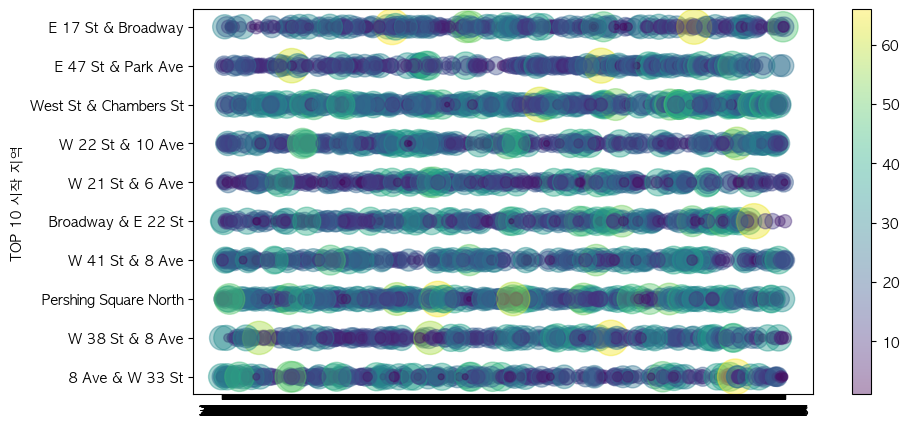

In [232]:
# 실습2) bike_id 기준으로 데이터를 분석
plt.figure(figsize=(10, 5))
plt.scatter(df_top['bike_id'], # x축(시작 시간)
            df_top['start_station_name'], # y축(TOP 10 지역)
            c=df_top['trip_duration_min'], # 색상 대여 시간
            s=df_top['trip_duration_min']*10, # 사이즈 대여 시간
            alpha=0.4,
            cmap='viridis')

plt.colorbar()
plt.ylabel('TOP 10 시작 지역')

plt.show()

In [235]:
df

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register,trip_duration_min
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36,6.500000
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29,14.233333
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55,8.766667
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32,14.750000
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34,5.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72030,2018-05-01,2018-05-01,23,23,207,3452,Bayard St & Leonard St,40.719156,-73.948854,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16883,Subscriber,1994,female,12,3.450000
72031,2018-05-01,2018-05-01,23,23,356,151,Cleveland Pl & Spring St,40.722104,-73.997249,319,Fulton St & Broadway,40.711066,-74.009447,17406,Subscriber,1994,male,21,5.933333
72032,2018-05-01,2018-05-01,22,23,516,526,E 33 St & 5 Ave,40.747659,-73.984907,435,W 21 St & 6 Ave,40.741740,-73.994156,29964,Subscriber,1975,male,37,8.600000
72033,2018-05-01,2018-05-01,22,23,427,379,W 31 St & 7 Ave,40.749156,-73.991600,477,W 41 St & 8 Ave,40.756405,-73.990026,20511,Subscriber,1972,male,14,7.116667


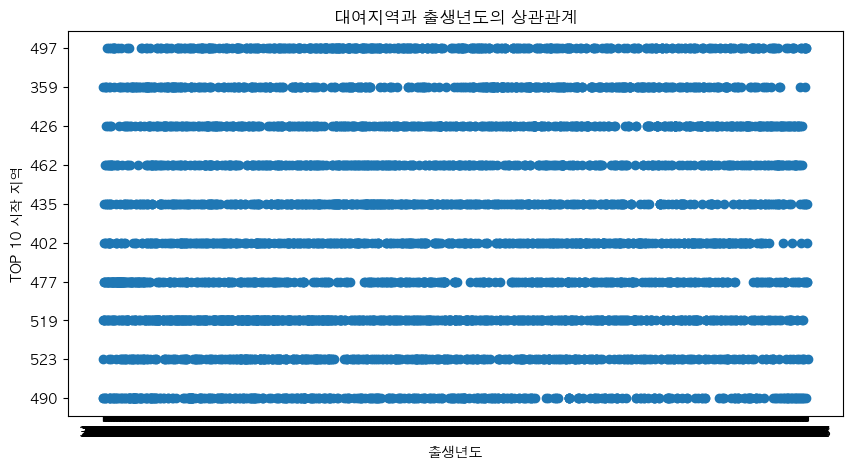

In [240]:
plt.figure(figsize=(10, 5))
plt.scatter(df_top['bike_id'],
            df_top['start_station_id'])

plt.xlabel('출생년도')
plt.ylabel('TOP 10 시작 지역')
plt.title('대여지역과 출생년도의 상관관계')

plt.show()

In [241]:
# 강사님 코드

In [ ]:
# 실습1) 연령대 변수(birth_year)가 어떤 변수와 

In [243]:
# 실습2) bike_id 기준으로 데이터를 분석
# 바이크의 누적 시간을 계산해서 감가상각 계산
# 사용량이 과도한 바이크 위주로 수거 & 보수 가능
# 바이크 사용량이 높은 바이크와 낮은 바이크가 존재한다면, 서로 교체해주는 것도 가능하다.

In [245]:
bike_id = df.groupby(['bike_id'])['trip_duration'].sum().to_frame()
bike_id

,trip_duration
bike_id,
14529,4263
14530,6963
14532,6636
14533,7368
14534,3576
...,...
33551,4709
33582,10420
33639,5550


In [249]:
bike_id['trip_duration_min'] = bike_id['trip_duration']/60
bike_id['trip_duration_hour'] = bike_id['trip_duration_min']/60
bike_id.describe().round()

,trip_duration,trip_duration_min,trip_duration_hour
count,10147.0,10147.0,10147.0
mean,7431.0,124.0,2.0
std,22090.0,368.0,6.0
min,71.0,1.0,0.0
25%,2891.0,48.0,1.0
50%,5595.0,93.0,2.0
75%,9275.0,155.0,3.0
max,1362517.0,22709.0,378.0


In [252]:
cut_point = bike_id['trip_duration_hour'].quantile(0.999)
bike_high = bike_id[bike_id['trip_duration_hour'] > cut_point]
bike_high

,trip_duration,trip_duration_min,trip_duration_hour
bike_id,,,
17354,145354,2422.566667,40.376111
19841,685774,11429.566667,190.492778
21514,145235,2420.583333,40.343056
24983,445775,7429.583333,123.826389
26404,179971,2999.516667,49.991944
26909,434861,7247.683333,120.794722
27371,347749,5795.816667,96.596944
28543,1048853,17480.883333,291.348056
30298,725557,12092.616667,201.543611


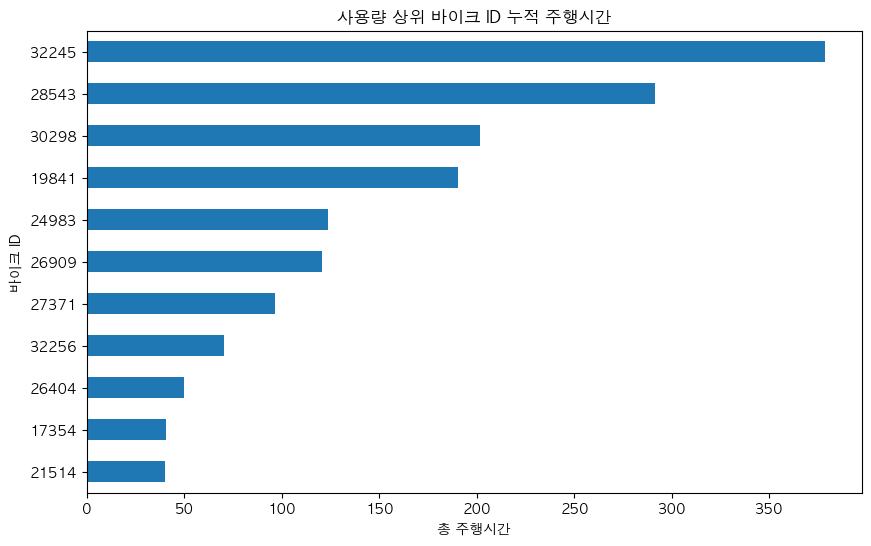

In [255]:
# 사용량 상위 바이크
plt.figure(figsize=(10, 6))
bike_high['trip_duration_hour'].sort_values().plot(kind='barh')
plt.xlabel('총 주행시간')
plt.ylabel('바이크 ID')
plt.title('사용량 상위 바이크 ID 누적 주행시간')
plt.show()

In [260]:
cut_point = bike_id['trip_duration_hour'].quantile(0.001)
bike_low = bike_id[bike_id['trip_duration_hour'] < cut_point]
bike_low

,trip_duration,trip_duration_min,trip_duration_hour
bike_id,,,
16414,72,1.200000,0.020000
17716,81,1.350000,0.022500
17816,89,1.483333,0.024722
18107,88,1.466667,0.024444
19460,96,1.600000,0.026667
19477,80,1.333333,0.022222
21198,88,1.466667,0.024444
21368,96,1.600000,0.026667
28218,71,1.183333,0.019722


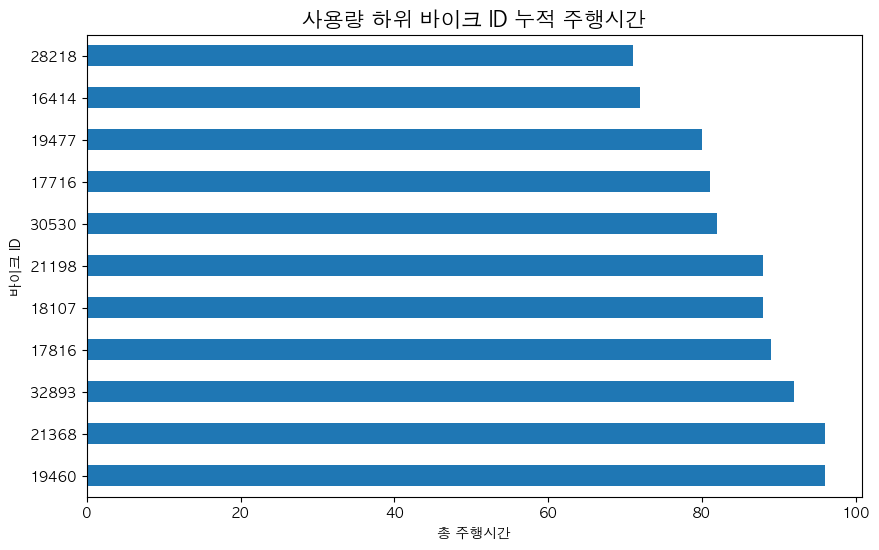

In [264]:
plt.figure(figsize=(10, 6))
bike_low['trip_duration'].sort_values(ascending=False).plot(kind='barh')
plt.xlabel('총 주행시간')
plt.ylabel('바이크 ID')
plt.title('사용량 하위 바이크 ID 누적 주행시간', size=15)
plt.show()

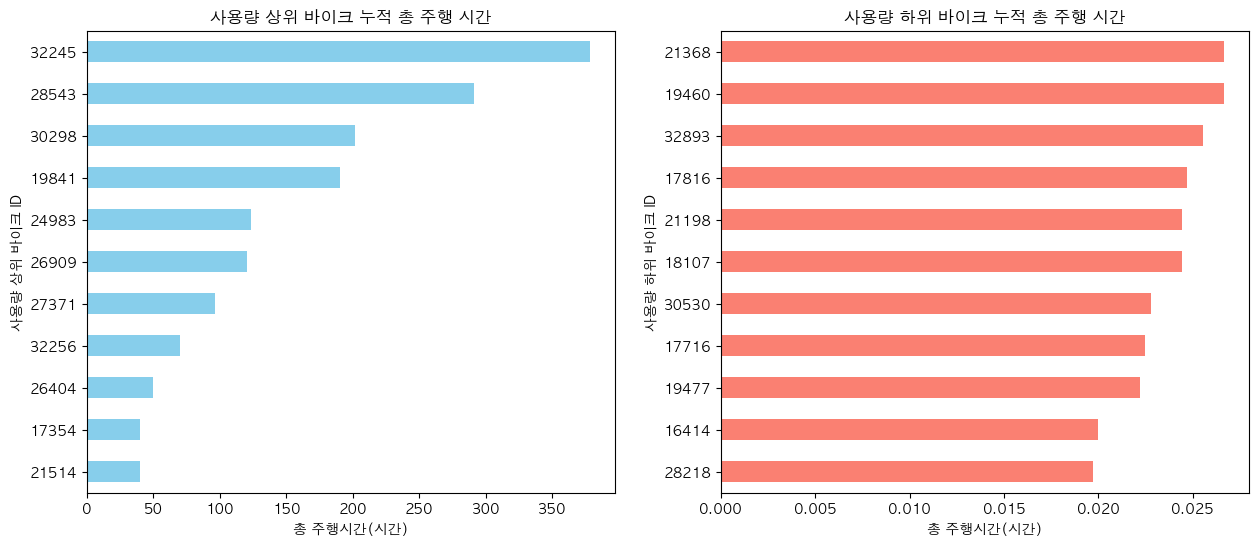

In [269]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
bike_high['trip_duration_hour'].sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('총 주행시간(시간)')
plt.ylabel('사용량 상위 바이크 ID')
plt.title('사용량 상위 바이크 누적 총 주행 시간')

plt.subplot(122)
bike_low['trip_duration_hour'].sort_values().plot(kind='barh', color='salmon')
plt.xlabel('총 주행시간(시간)')
plt.ylabel('사용량 하위 바이크 ID')
plt.title('사용량 하위 바이크 누적 총 주행 시간')
plt.clim(0, 390)
plt.show()

상위 바이크와 하위 바이크 총 누적 주행 시간이 차이가 심하다.

상위 바이크는 고장 가능성이 높으니 수거, 수리가 필요할 것으로 예상된다. 또한, 하위 바이크와 위치를 변경해 자전거 고장 기능성을 낮추자.

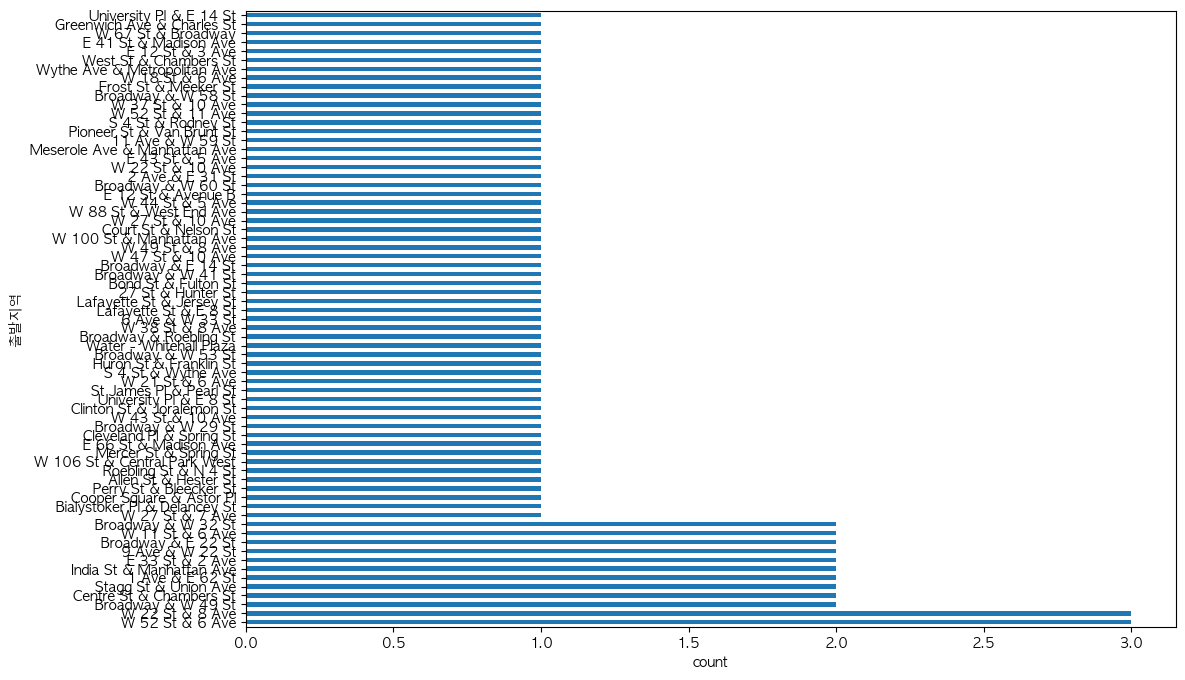

In [276]:
# 상위 바이크, 하위 바이크 start_station_name
start_locatoins = df[df['bike_id'].isin(bike_high.index)]['start_station_name']

start_locatoins.value_counts().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('출발지역')
plt.show()

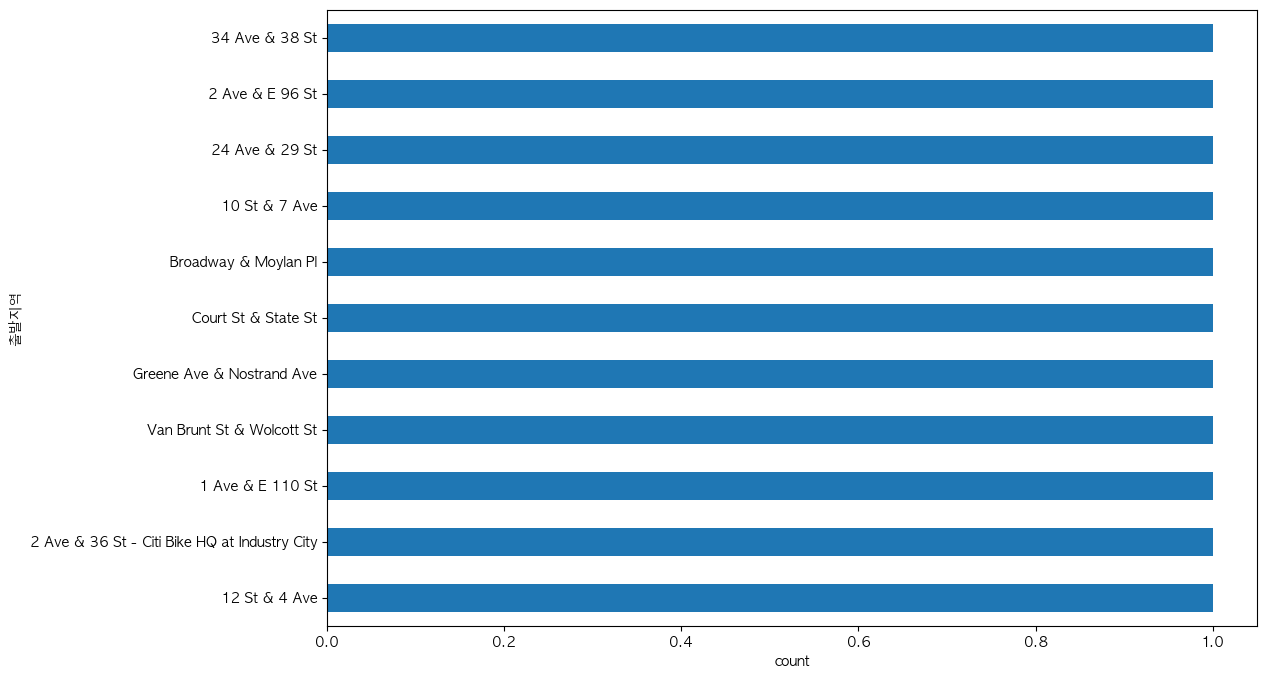

In [277]:
start_locatoins = df[df['bike_id'].isin(bike_low.index)]['start_station_name']

start_locatoins.value_counts().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('출발지역')
plt.show()

상위 바이크와 하위 바이크가 지역에 따라 집중되어 있는 것은 아니다.

지역 내에서 정확한 배치 위치를 파악을 해서 장소를 재배치하는 것을 추천한다.

In [291]:
# 2. 연령대(10, 20대 등) 변수가 어떤 변수와 관계를 보면 좋을지 시각화 등과 함께 해석해보기
import datetime
now = datetime.datetime.now()
now

datetime.datetime(2024, 5, 29, 15, 27, 12, 676137)

In [303]:
now.year

2024

In [304]:
df['age'] = now.year - df['birth_year']
df['age']

0        79
1        26
2        70
3        61
4        59
         ..
72030    30
72031    30
72032    49
72033    52
72034    31
Name: age, Length: 72035, dtype: int64

In [305]:
df['age'].describe()

count    72035.000000
mean        46.005053
std         11.868175
min         22.000000
25%         36.000000
50%         44.000000
75%         55.000000
max        139.000000
Name: age, dtype: float64

In [306]:
bins = [10, 20, 30, 40, 50, 60, 70, 80]
bins_names = [10, 20, 30, 40, 50, 60, 70]

df['age_bin'] = pd.cut(df['age'], bins, labels=bins_names)
df['age_bin']

0        70
1        20
2        60
3        60
4        50
         ..
72030    20
72031    20
72032    40
72033    50
72034    30
Name: age_bin, Length: 72035, dtype: category
Categories (7, int64): [10 < 20 < 30 < 40 < 50 < 60 < 70]

In [307]:
df['age_bin'].describe()

count     71801
unique        6
top          30
freq      24380
Name: age_bin, dtype: int64

In [308]:
df.dtypes
# 본 확인을 통해 데이터(범주형 데이터)가 추가된 모습을 확인할 수 있다.

start_date                   object
end_date                     object
start_hour                    int64
end_hour                      int64
trip_duration                 int64
start_station_id             object
start_station_name           object
start_station_latitude      float64
start_station_longitude     float64
end_station_id               object
end_station_name             object
end_station_latitude        float64
end_station_longitude       float64
bike_id                      object
usertype                     object
birth_year                    int64
gender                       object
day_since_register            int64
trip_duration_min           float64
age                           int64
age_bin                    category
dtype: object

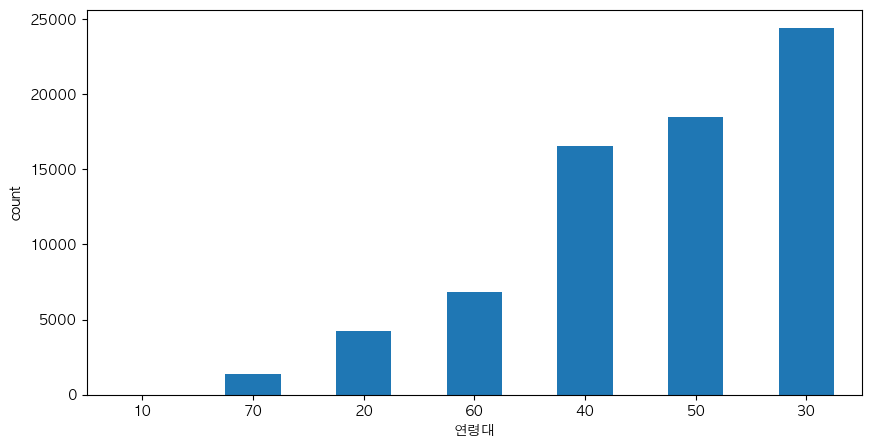

In [309]:
plt.figure(figsize=(10, 5))
df['age_bin'].value_counts(ascending=True).plot(kind='bar')
plt.xlabel('연령대')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

In [310]:
base = df.groupby(['age_bin', 'start_hour'])['bike_id'].count().unstack()
base

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
age_bin,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,29,14,9,5,5,21,72,196,302,185,...,213,235,247,414,474,364,295,201,149,84
30,88,36,26,11,25,133,673,1351,2430,1574,...,811,859,1261,2645,3336,2350,1560,1030,700,379
40,45,32,27,36,16,135,456,961,1715,1125,...,708,768,1071,2023,1841,1248,741,483,317,175
50,54,25,13,9,19,114,403,905,1437,1004,...,1186,1209,1488,1976,1764,1206,730,499,313,216
60,20,2,4,5,8,67,227,484,659,368,...,417,397,528,773,669,364,253,135,89,52
70,2,2,1,0,4,6,26,72,110,67,...,107,109,110,138,119,79,47,32,13,15


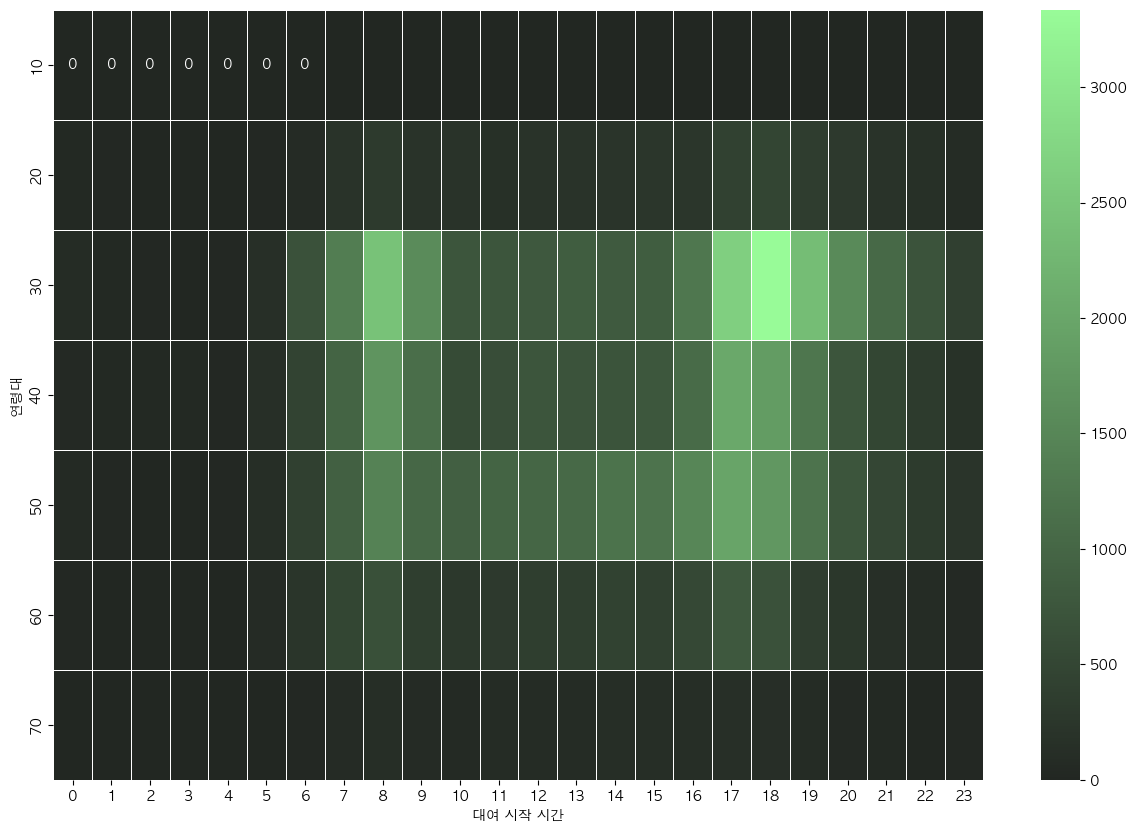

In [312]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(base, annot=True, ax=ax, linewidths=.5, fmt='.0f', cmap=pal)
plt.xlabel('대여 시작 시간')
plt.ylabel('연령대')
plt.show()
# 데이터가 이상하게 들어간 것 같아서, 강의 코드보고 다시 실행해보기.

뉴욕 바이크 주 소비자 층 : 20~40대까지 직장인

주 사용 시간대는 출/퇴근 시간대로 파악이 된다.